In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Regression/Polynomial Regression/Data/Salary_Position.csv')

In [4]:
df.head()

,Position,Level,Salary
0,Junior developer,1,35500
1,Senior developer,2,48000
2,Junior consultant,3,50000
3,Senior consultant,4,60555
4,Manager,5,80000


In [5]:
df.shape

(13, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  13 non-null     object
 1   Level     13 non-null     int64 
 2   Salary    13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 440.0+ bytes


In [7]:
df.Position.value_counts()

Position
Junior developer     1
Senior developer     1
Junior consultant    1
Senior consultant    1
Manager              1
General Manager      1
Regional Manager     1
Country Manager      1
Partner              1
Senior Partner       1
MD                   1
CEO                  1
Chairman             1
Name: count, dtype: int64

<Axes: xlabel='Level', ylabel='Salary'>

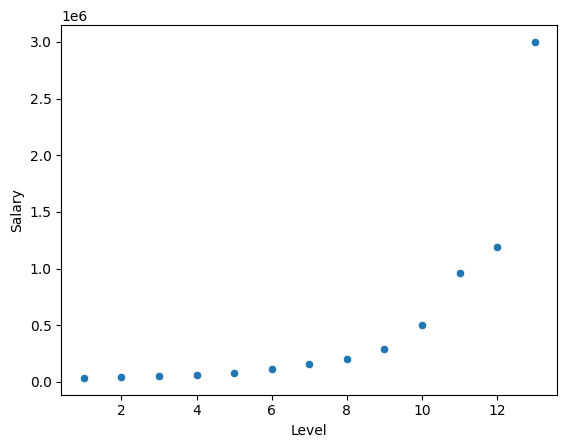

In [8]:
sns.scatterplot(data=df,x='Level',y='Salary')

<Axes: xlabel='Level', ylabel='Salary'>

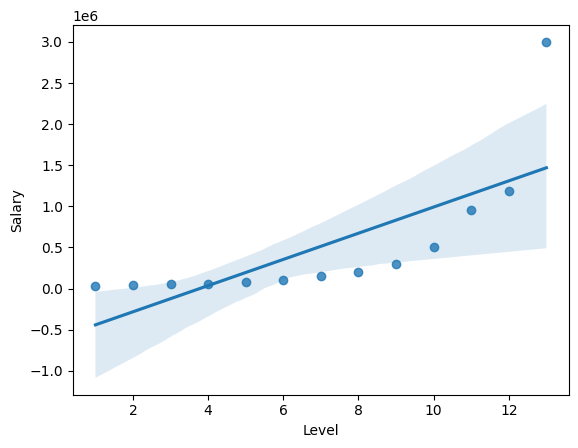

In [9]:
sns.regplot(data=df,x='Level',y='Salary')

In [10]:
# Removing Position column

df.drop('Position',axis=1,inplace=True)


In [11]:
df.head()

,Level,Salary
0,1,35500
1,2,48000
2,3,50000
3,4,60555
4,5,80000


In [16]:
x = df[['Level']].values

In [17]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13]])

In [18]:
y = df['Salary'].values
y

array([  35500,   48000,   50000,   60555,   80000,  110050,  155000,
        200000,  295000,  500000,  960000, 1190000, 3000000])

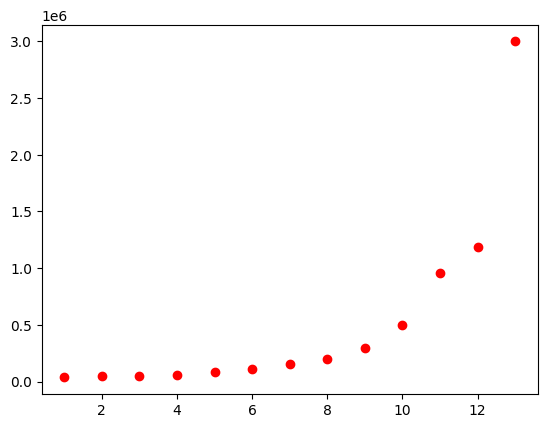

In [20]:
plt.scatter(x,y,color='red')
plt.show()

- Since the data points are non-linear and represent a curve, we can not use Simple Linear Regression Model on this data.

In [58]:
# We use Simple Linear Regression Model 
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [59]:
slr.fit(x,y)

LinearRegression()

In [60]:
y_pred = slr.predict(x)

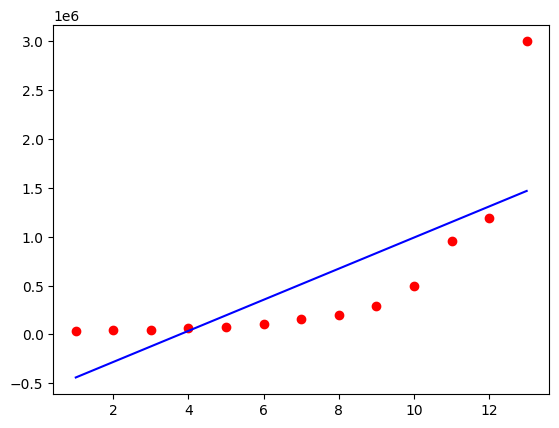

In [61]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.show()

In [62]:
slr.score(x,y)

0.5537636591968075

- Used PolynomialFeatures
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
- We should first decide the 'degree' value and pass it to the object of PolynomialFeatures class.

In [63]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

- Next step is to convert the x data using fit_transform()method of PolynomialFeatures class.

In [64]:
x1 = pf.fit_transform(x)

- We have to apply Polynomial Linear Regression on this converted data x1 along with y.

In [65]:
plr = LinearRegression()
plr.fit(x1,y)

LinearRegression()

In [66]:
y_pred = plr.predict(x1)

In [67]:
plr.score(x1,y)

0.8447769244301286

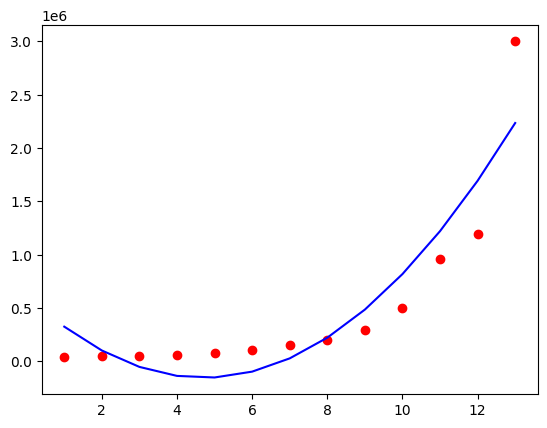

In [68]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.show()

- Findout the best fit line and find the best degree value.
- Using the for loop

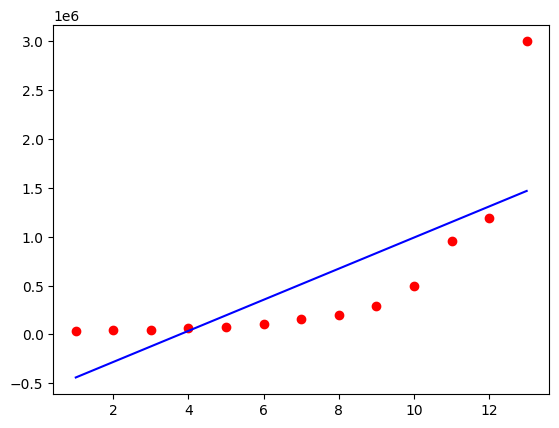

0.5537636591968075
PolynomialFeatures value is: 1
------------------


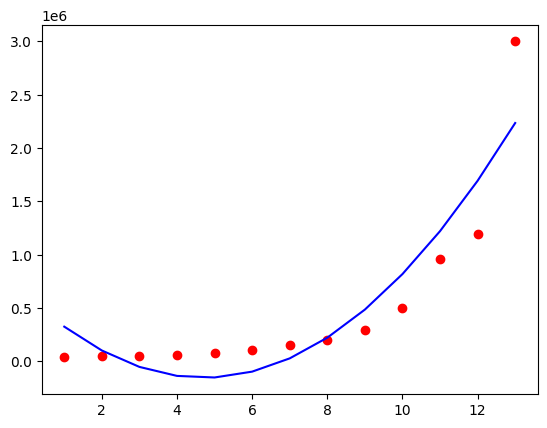

0.8447769244301286
PolynomialFeatures value is: 2
------------------


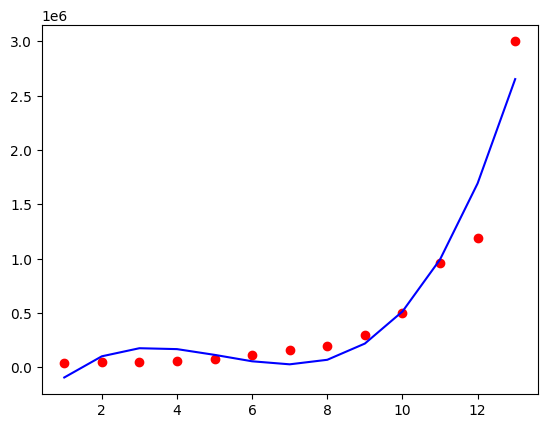

0.9442319934075227
PolynomialFeatures value is: 3
------------------


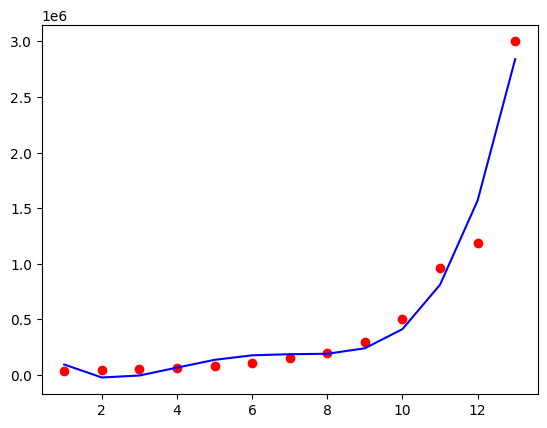

0.9733821640201347
PolynomialFeatures value is: 4
------------------


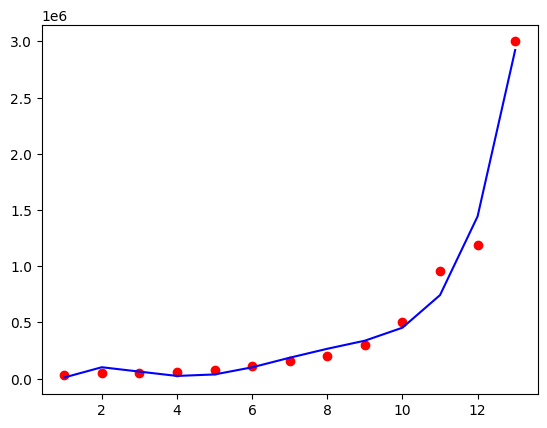

0.9839826700547956
PolynomialFeatures value is: 5
------------------


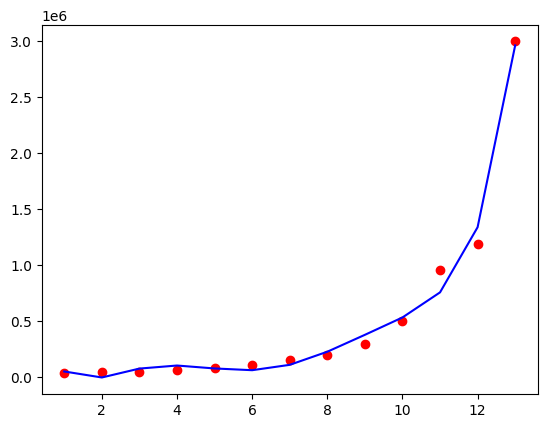

0.9900149813703926
PolynomialFeatures value is: 6
------------------


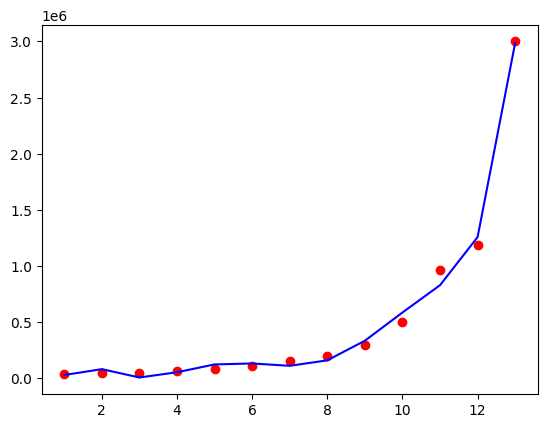

0.9952325601657936
PolynomialFeatures value is: 7
------------------


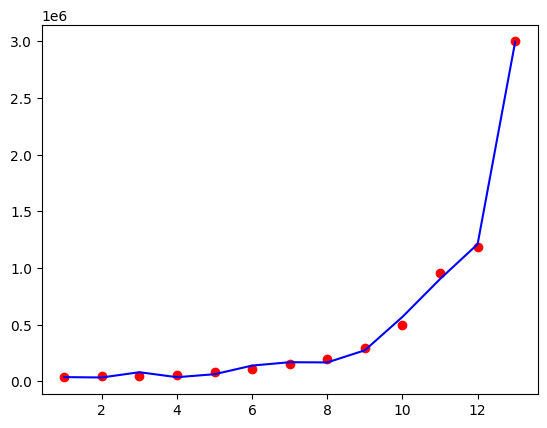

0.9984370801255862
PolynomialFeatures value is: 8
------------------


In [34]:
for i in range(1,9):
    poly = PolynomialFeatures(degree=i)
    x1 = poly.fit_transform(x)
    plr = LinearRegression()
    plr.fit(x1,y)
    y_plr_pred = plr.predict(x1)
    plt.scatter(x,y,color='red')
    plt.plot(x,y_plr_pred,color='blue')
    plt.show()
    print(plr.score(x1,y))
    print('PolynomialFeatures value is:',i)
    print('------------------')

- Now select the value is 7 or 8 .
- Now apply the Ploynomial Regression Model

In [69]:
pf = PolynomialFeatures(degree=7)
x1 = pf.fit_transform(x)

In [70]:
plr = LinearRegression()
plr.fit(x1,y)

LinearRegression()

In [71]:
y_pred_pol = plr.predict(x1)

In [72]:
slr.score(x,y)

0.5537636591968075

In [73]:
from sklearn.metrics import r2_score
r2_score(y,slr.predict(x))

0.5537636591968075

In [74]:
plr.score(x1,y)

0.9952325601657936

In [75]:
r2_score(y,y_pred_pol)

0.9952325601657936

In [76]:
inputs = [[10],[11]]

In [77]:
inputs1= pf.fit_transform(inputs)

In [78]:
plr.predict(inputs1)

array([585184.15585491, 828604.60363981])